In [12]:
import pandas as pd
import numpy as np

In [13]:
df = pd.read_csv("balanced.csv")

In [14]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,title,publication,author,date,year,month,url,content,Bias
0,0,38250,39519,58376,What if FDR had lived through his final term?,CNN,Brenna Williams,2016-10-07,2016.0,10.0,NaN,(CNN) President Franklin Roosevelt led the co...,left
1,1,23111,126573,189171,North Carolina students sue U.S. over stance o...,Reuters,Colleen Jenkins,2016-05-11,2016.0,5.0,http://www.reuters.com/article/us-north-caroli...,A group of North Carolina public school stude...,center
2,2,18691,122153,181491,Shares in Japan’s Takata suspended after repor...,Reuters,Naomi Tajitsu and Chang-Ran Kim,2017-04-27,2017.0,4.0,http://www.reuters.com/article/us-takata-restr...,Trading in Takata Corp shares was suspended o...,center
3,3,22205,75614,115677,"The More Trump Wins, the Angrier They Get",National Review,Conrad Black,2017-03-07,2017.0,3.0,http://www.nationalreview.com/article/445549/d...,The frenzy of the Never Trump movement becomes...,center-left
4,4,9432,9432,28168,Mel Gibson-Vince Vaughn Cop Thriller ’Dragged ...,Breitbart,Daniel Nussbaum,2017-05-18,2017.0,5.0,NaN,Lionsgate has acquired the U. S. distribution ...,center-left


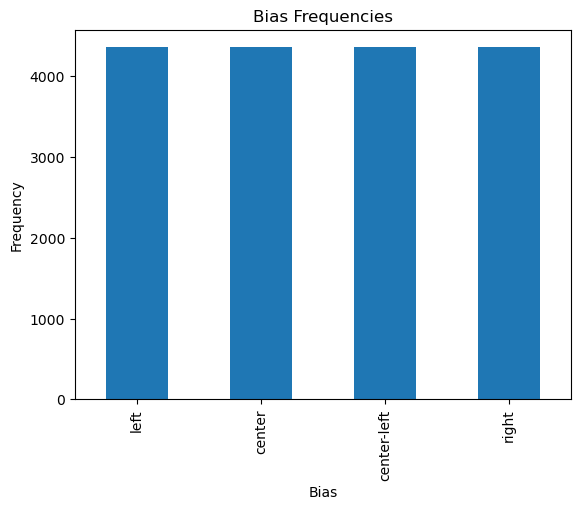

In [15]:
import matplotlib.pyplot as plt

# Count the occurrences of each value in the "Bias" column
counts = df['Bias'].value_counts()

# Create a bar chart of the results
counts.plot(kind='bar')

# Set the chart title and axis labels
plt.title('Bias Frequencies')
plt.xlabel('Bias')
plt.ylabel('Frequency')

# Display the chart
plt.show()

# Preprocessing


In [16]:
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd

def preprocess(text):
    # Remove numbers and punctuation
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    return text


# Preprocess the 'text' column
df['text_processed'] = df['content'].apply(preprocess)

In [17]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,title,publication,author,date,year,month,url,content,Bias,text_processed
0,0,38250,39519,58376,What if FDR had lived through his final term?,CNN,Brenna Williams,2016-10-07,2016.0,10.0,NaN,(CNN) President Franklin Roosevelt led the co...,left,CNN President Franklin Roosevelt led the coun...
1,1,23111,126573,189171,North Carolina students sue U.S. over stance o...,Reuters,Colleen Jenkins,2016-05-11,2016.0,5.0,http://www.reuters.com/article/us-north-caroli...,A group of North Carolina public school stude...,center,A group of North Carolina public school stude...
2,2,18691,122153,181491,Shares in Japan’s Takata suspended after repor...,Reuters,Naomi Tajitsu and Chang-Ran Kim,2017-04-27,2017.0,4.0,http://www.reuters.com/article/us-takata-restr...,Trading in Takata Corp shares was suspended o...,center,Trading in Takata Corp shares was suspended o...
3,3,22205,75614,115677,"The More Trump Wins, the Angrier They Get",National Review,Conrad Black,2017-03-07,2017.0,3.0,http://www.nationalreview.com/article/445549/d...,The frenzy of the Never Trump movement becomes...,center-left,The frenzy of the Never Trump movement becomes...
4,4,9432,9432,28168,Mel Gibson-Vince Vaughn Cop Thriller ’Dragged ...,Breitbart,Daniel Nussbaum,2017-05-18,2017.0,5.0,NaN,Lionsgate has acquired the U. S. distribution ...,center-left,Lionsgate has acquired the U S distribution ri...


# Creating the Model

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df["text_processed"], df["Bias"], test_size = 0.10, random_state = 19) 

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Convert token counts to normalized term frequency (tf) values
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_test_tf = tf_transformer.transform(X_test_counts)

In [20]:
print(X_train.shape)

(15674,)


In [21]:
print(y_train.shape)

(15674,)


In [22]:
print(X_test.shape)
print(y_test.shape)

(1742,)
(1742,)


In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_tf, y_train)

RandomForestClassifier()

# Testing


In [24]:
accuracy = model.score(X_test_tf, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7738231917336394


In [25]:
text = "In recent years, there has been an alarming increase in the number of vaccinations being administered to children and adults alike. Despite claims by the medical establishment that vaccines are safe and effective, there is mounting evidence to suggest that they may actually be quite dangerous.First and foremost, vaccines have been linked to a number of serious health problems, including autism, autoimmune disorders, and even death. While the medical establishment may downplay these risks, there is no denying the fact that vaccines have been responsible for countless tragedies.Furthermore, it is important to note that vaccines are not always effective. In fact, many people who receive vaccines still end up contracting the diseases they were supposed to be protected against."
def predict_p(input_text):

    # Preprocess the input text
    processed_text = preprocess(input_text)

    processed_text_counts = vectorizer.transform([processed_text])

    # Convert token counts to normalized term frequency (tf) values
    tf_transformer = TfidfTransformer(use_idf=False).fit(processed_text_counts)
    processed_text_tf = tf_transformer.transform(processed_text_counts)

    # Use the loaded model to make predictions on the preprocessed input text
    prediction = model.predict(processed_text_tf)[0]

    return prediction

print(predict_p(text))

center-left


In [26]:
print(predict_p("In recent years, there has been an alarming increase in the number of vaccinations being administered to children and adults alike. Despite claims by the medical establishment that vaccines are safe and effective, there is mounting evidence to suggest that they may actually be quite dangerous.First and foremost, vaccines have been linked to a number of serious health problems, including autism, autoimmune disorders, and even death. While the medical establishment may downplay these risks, there is no denying the fact that vaccines have been responsible for countless tragedies."))

center-left


In [27]:
print(predict_p("The United States is “cautiously optimistic” that there will be an agreement to allow humanitarian aid to get into Sudan, a top State Department official said Wednesday amid ongoing talks between the warring Sudanese military factions.However, the US is also prepared to apply economic pressure to the parties “depending upon how the talks go,” and “there are” sanctions ready to go, Undersecretary of State for Political Affairs Victoria Nuland said at a Senate Foreign Relations Committee hearing Wednesday.Intense fighting between the Rapid Support Forces (RSF) and the Sudanese Armed Forces (SAF) has left hundreds dead and thousands injured, caused tens of thousands to flee their homes and has left the country on the brink of a civil war and a massive humanitarian catastrophe. Several ceasefires between the parties have not yielded an end to the fighting.Weeks after the fighting broke out, the leaders of the RSF and SAF agreed to send representatives to the Saudi city of Jeddah for “pre-negotiation talks” mediated by the US and Saudi Arabia.“Our goal for these talks has been very narrowly focused. First securing agreement on a declaration of humanitarian principles and then getting a ceasefire that is long enough to facilitate the steady delivery of badly needed services,” Nuland said.Nuland told lawmakers she had spoken with the US negotiators, led by US Ambassador to Sudan John Godfrey and Assistant Secretary of State for African Affairs Molly Phee, and described them as “cautiously optimistic” that the initial stage of talks would be successful.“We can’t get anything done in Sudan, we can’t even restore a process in which civilians are participating until the violence stops and we get some aid in,” she said.“We’re, as I said, cautiously optimistic that this first installment on getting humanitarian support in will allow us to get going in coming days,” Nuland said. “Then the ceasefire has to be more durable.”Last week, President Joe Biden signed a new executive order authorizing sanctions on those “responsible for threatening the peace, security, and stability of Sudan; undermining Sudan’s democratic transition; using violence against civilians; or committing serious human rights abuses."))

center-left


In [31]:
print(predict_p("The Black Lives Matter movement started a massive wave of Americans uniting to call for defunding the police and eradicating white supremacy to make positive changes for Black Americans. But experts reflecting on the movement’s scorecard in 2022 say Black America hasn’t benefited.I would argue that, on balance, these communities are worse off because by [BLM] overemphasizing the role of police, they've changed police behavior for the worse,the Manhattan Institute’s Jason Riley told Fox News Digital in a phone interview. In other words, police do become more cautious. They're less likely to get out of their cars and engage with people in the community. And to the extent that police are less proactive, the criminals have the run of the place."))

right


In [ ]:
print(predict_p("House Republicans on Wednesday advanced legislation to kill President Biden’s attempt to cancel student loan debt for tens of millions of borrowers, a controversial move that the government has said would cost it more than $400 billion.The House Education and the Workforce Committee passed a resolution aimed at terminating Biden’s policy, which was supported by every Republican on the committee and opposed by every Democrat. Committee passage means the resolution, from Rep. Bob Good, R-Va., now has a chance to get a vote on the House floor.I am pleased to lead the House effort to overturn President Biden’s student loan transfer scheme that would burden the wallets of hardworking American taxpayers to the tune of hundreds of billions of dollars, Good told Fox News Digital. His plan to force American citizens to pay off the debts of others is unfair, unethical, unconstitutional and unlawful."))

## Downloading the Model

In [ ]:
import joblib
joblib.dump(model, 'random_forest_model.joblib')

In [ ]:
joblib.dump(vectorizer, 'vectorizer.joblib')